# How to do a few useful things with Pandas and the WPRDC

This notebook will show you how to do some basic data manipulation and analysis tasks with [Pandas](https://pandas.pydata.org/) using data from the [Western Pennsylvania Regional Datacenter(WPRDC)](http://www.wprdc.org/).

- How to find a dataset on the WPRDC
- How to read a data dictionary to learn about a dataset
- How to open a CSV file
- How to do basic maths on numerical columns
- How to count values on categorical columns
- How to group by a column and then do maths or count
- How to create a histogram of one column
- How to create a bar chart of categorical and numerical data
- How to create a line chart of temporal and numerical data

In [3]:
# load the libraries first!
import pandas as pd
%matplotlib inline

## How to find a dataset on the WPRDC

* Go to https://data.wprdc.org/dataset 
* Browse the top datasets or search for keywords

## How to read a data dictionary to learn about a dataset

* Visit a dataset page, like [the police blotter archive](https://data.wprdc.org/dataset/uniform-crime-reporting-data)
* Click on the "Archived Police Incident Blotter Data Dictionary" Preview button
* The data dictionary is a spreadsheet that tells you what each column represents.

## How to open a CSV file from your machine

* The [City of Pittsburgh Trees](https://data.wprdc.org/dataset/city-trees) data has alread been downloaded to this repository in a file called `trees.data`

In [7]:
tree_data = pd.read_csv("trees.csv")
tree_data.head() # ignore the warning

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,545537040,6720,GREENWOOD ST,Spruce: Colorado,Picea pungens,39.0,9.0,99.0,99.0,Open or Unrestricted,...,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.486831,-79.927939
1,1184404447,6100,EAST LIBERTY BLVD,Pear: Callery,Pyrus calleryana,24.0,7.0,99.0,27.0,Median,...,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-8,40.465343,-79.920659
2,316598882,400,NEGLEY RUN BLVD,Cherry/Plum: spp.,Prunus spp.,8.0,3.0,99.0,9.0,Median,...,Larimer,9.0,11.0,42003111300,2.0,11.0,5.0,3-8,40.465729,-79.919438
3,1560422223,1200,MURRAY HILL AVE,Vacant Site Small,Vacant Site Small,NaN,NaN,NaN,NaN,Tree Lawn or Parkway,...,Squirrel Hill North,8.0,14.0,42003140200,3.0,14.0,4.0,2-17,40.446159,-79.925766
4,1748576446,2625,LIBERTY AVE,Vacant Site Not Suitable,Vacant Site Not Suitable,NaN,NaN,NaN,NaN,Well or Pit,...,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-25,40.455189,-79.976694


## How to open a CSV file from the web

* You can open CSV files directly from the web
* If you right click the download link you can copy the link to clipboard and use it in a variable to pass to the `read_csv` function.
* This examples uses the [police blotter dataset](https://data.wprdc.org/dataset/uniform-crime-reporting-data)

In [8]:
# URL that points directly to the police blotter dataset 
URL = "https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e"

police_data = pd.read_csv(URL)
police_data.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2868421,16202072.0,99,2016-10-26T04:00:00,"2000 Block Centre AV Pittsburgh, PA 15219",Y,Crawford-Roberts,2,NaN,9124 Drug Investigation,305.0,6.0,3.0,-79.979979,40.443581
1,2874934,16221357.0,99,2016-11-25T18:42:00,"Marne WY Pittsburgh, PA 15211",Y,Mount Washington,3,NaN,9999 Miscellaneous Report (No Crime),1914.0,7.0,2.0,-79.947030,40.463145
2,2881141,16239016.0,5,2016-12-25T02:24:00,"2200 Block Wilner DR Pittsburgh, PA 15221",N,Terrace Village,5,BURGLARY/FORCE ENT/RES,3502 Burglary.,510.0,9.0,2.0,-79.866830,40.453388
3,2822209,16062438.0,11,2016-04-07T11:30:00,"1100 Block Dagmar AV Pittsburgh, PA 15216",N,Beechview,6,IDENTITY THEFT,4120 Identity Theft,1916.0,4.0,5.0,-80.023186,40.417259
4,2844543,16131818.0,10,2016-07-16T00:27:00,"7500 Block Hamilton AV Pittsburgh, PA 15208",N,Homewood South,5,SIMPLE ASSAULT/INJURY,2702 Aggravated Assault.,1303.0,9.0,2.0,-79.892482,40.453422


## How to do basic maths on numerical columns

* The tree data contains some numerical columns according to the [data dictionary](https://data.wprdc.org/dataset/city-trees/resource/d47d47da-5044-417c-a24d-8366fd7b1a09) so lets math them

In [9]:
# Compute the average height of the trees in pittsburgh
tree_data['height'].mean()

22.159484114501417

In [10]:
# How tall is the tallest tree in Pittsburgh
tree_data['height'].max()

158.0

## How to count values on categorical columns

* The three data also contains some categorical values, like the `common_name` column

In [12]:
tree_data['common_name'].value_counts()

Maple: Norway                        3713
Maple: Red                           3421
London planetree                     3224
Pear: Callery                        2968
Vacant Site Small                    2419
Linden: Littleleaf                   2411
Honeylocust: Thornless               2019
Oak: Pin                             1669
Crabapple: Flowering                 1293
Ginkgo                               1206
Stump                                1079
Oak: Northern Red                     976
Sweetgum: American                    892
Vacant Site Not Suitable              846
Elm: American                         796
Maple: Freeman                        789
Maple: Sugar                          712
Locust: Black                         688
Zelkova: Japanese                     608
Maple: Hedge                          573
Cherry/Plum: spp.                     566
Lilac: Japanese Tree                  564
Vacant Site Large                     563
Spruce: Colorado                  

## How to group by a column and then to maths or counts

* Neighborhood seems like a good column to group by

In [15]:
# Group the dataset by the neighborhood column
# Then select the height column
# then compute the mean
tree_data.groupby('neighborhood')['height'].mean()

neighborhood
Allegheny Center              0.794220
Allegheny West               15.178378
Allentown                    22.378788
Arlington                    20.531915
Arlington Heights            42.600000
Banksville                   28.436019
Bedford Dwellings            20.209581
Beechview                    26.415945
Beltzhoover                  21.049180
Bloomfield                   23.995932
Bluff                        19.645631
Bon Air                      24.771739
Brighton Heights             27.962871
Brookline                    28.693384
California-Kirkbride         26.571429
Carrick                      25.075823
Central Business District    21.178904
Central Lawrenceville        18.567398
Central Northside            23.472089
Central Oakland              16.318436
Chartiers City               35.972973
Chateau                      18.441065
Crafton Heights              30.046823
Crawford-Roberts             21.044681
Duquesne Heights             18.730337
East Alleghe

## How to create a histogram of one column

* Histograms are useful for looking at the distrbution of data across a single column

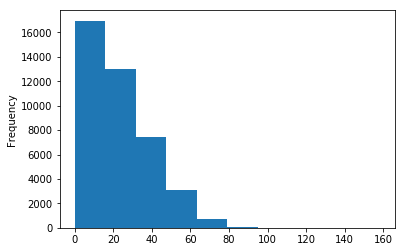

In [19]:
# select the heigh column 
# then create a histogram with the hist() function
tree_data['height'].plot(kind="hist")

## Create bar chart of categorical and numerical data


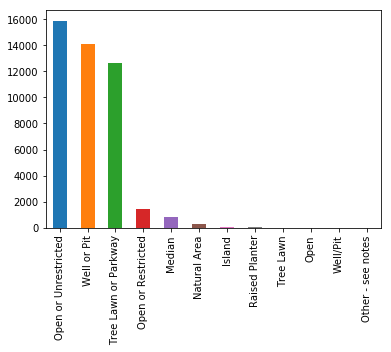

In [22]:
tree_data['growth_space_type'].value_counts().plot(kind="bar")

## How to create a line chart of temporal and numerical data

* 

In [30]:
# URL that points directly to the police blotter dataset 
URL = "https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e"

# Open the data with data parsing true 
# and set the index to the column with time data
police_data = pd.read_csv(URL, 
                          parse_dates=True, 
                          index_col='INCIDENTTIME')
police_data.head()

,PK,CCR,HIERARCHY,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTTIME,,,,,,,,,,,,,,
2016-10-26 04:00:00,2868421,16202072.0,99,"2000 Block Centre AV Pittsburgh, PA 15219",Y,Crawford-Roberts,2,NaN,9124 Drug Investigation,305.0,6.0,3.0,-79.979979,40.443581
2016-11-25 18:42:00,2874934,16221357.0,99,"Marne WY Pittsburgh, PA 15211",Y,Mount Washington,3,NaN,9999 Miscellaneous Report (No Crime),1914.0,7.0,2.0,-79.947030,40.463145
2016-12-25 02:24:00,2881141,16239016.0,5,"2200 Block Wilner DR Pittsburgh, PA 15221",N,Terrace Village,5,BURGLARY/FORCE ENT/RES,3502 Burglary.,510.0,9.0,2.0,-79.866830,40.453388
2016-04-07 11:30:00,2822209,16062438.0,11,"1100 Block Dagmar AV Pittsburgh, PA 15216",N,Beechview,6,IDENTITY THEFT,4120 Identity Theft,1916.0,4.0,5.0,-80.023186,40.417259
2016-07-16 00:27:00,2844543,16131818.0,10,"7500 Block Hamilton AV Pittsburgh, PA 15208",N,Homewood South,5,SIMPLE ASSAULT/INJURY,2702 Aggravated Assault.,1303.0,9.0,2.0,-79.892482,40.453422


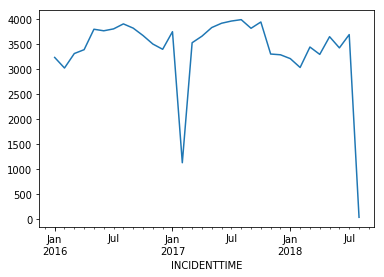

In [41]:
police_data.loc['2016':'2018'].resample("M").size().plot()